## **Customer Churn Analysis**

## **Imports & Load**

In [8]:
import pandas as pd
import numpy as np 

df = pd.read_csv("telco_customer_churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,No,41,Yes,Yes,No,No internet service,Yes,Yes,No internet service,No internet service,No internet service,One year,Yes,Credit card,62.29,2558.86,No
1,Female,0,No,Yes,42,Yes,No phone service,Fiber optic,No internet service,Yes,No,No,No internet service,No,One year,Yes,Electronic check,51.84,2171.02,No
2,Female,0,Yes,Yes,50,Yes,No,Fiber optic,No internet service,No,No,No,No,Yes,Month-to-month,No,Mailed check,68.67,3440.33,Yes
3,Male,0,No,No,27,Yes,No phone service,No,No,No internet service,No,No internet service,Yes,No,One year,Yes,Mailed check,116.34,3136.70,No
4,Female,0,Yes,Yes,48,Yes,Yes,Fiber optic,No,Yes,Yes,No internet service,No,Yes,Month-to-month,Yes,Electronic check,82.26,3957.67,Yes


## **Basic Understanding of the Dataset**

In [9]:
print("Shape:", df.shape)
df.dtypes

Shape: (7043, 20)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## **Churn Overview**

In [10]:
print(df["Churn"].value_counts())
print("\nChurn rate (%):")
print(df["Churn"].value_counts(normalize=True) * 100)

Churn
No     5164
Yes    1879
Name: count, dtype: int64

Churn rate (%):
Churn
No     73.321028
Yes    26.678972
Name: proportion, dtype: float64


## **Identify Patterns (EDA)**
Why Churn is happening

## **Churn by Contract Type**

In [13]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).mul(100).round(2)

Contract        Churn
Month-to-month  No       73.43
                Yes      26.57
One year        No       72.35
                Yes      27.65
Two year        No       74.17
                Yes      25.83
Name: proportion, dtype: float64

## **Churn by Internet Service**

In [14]:
df.groupby("InternetService")["Churn"].value_counts(normalize=True).mul(100).round(2)

InternetService  Churn
DSL              No       73.59
                 Yes      26.41
Fiber optic      No       73.05
                 Yes      26.95
No               No       73.33
                 Yes      26.67
Name: proportion, dtype: float64

## **Churn by Senior Citizen**

In [15]:
df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).mul(100).round(2)

SeniorCitizen  Churn
0              No       73.25
               Yes      26.75
1              No       73.67
               Yes      26.33
Name: proportion, dtype: float64

## **Churn based on Monthly Charges**

In [16]:
df.groupby("Churn")["MonthlyCharges"].mean().round(2)

Churn
No     70.26
Yes    69.21
Name: MonthlyCharges, dtype: float64

## **Visual Analysis**

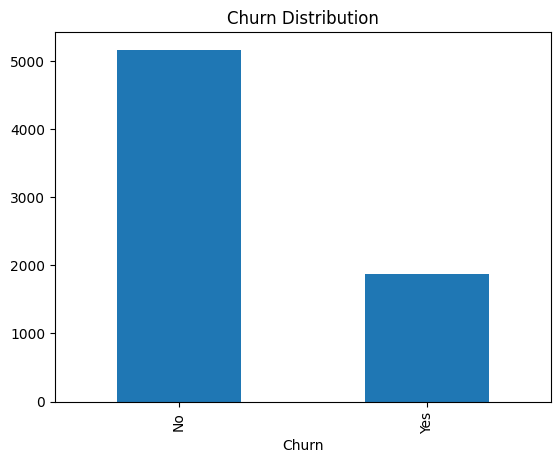

In [17]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar", title="Churn Distribution")
plt.show()

## **Contract Type**

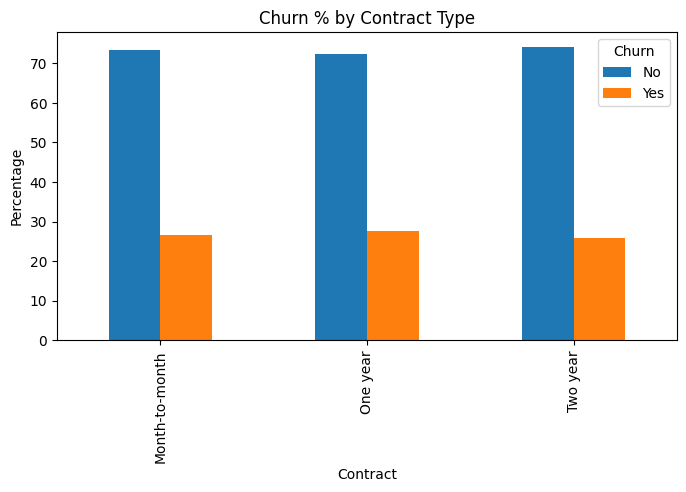

In [18]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).mul(100).unstack().plot(kind="bar", figsize=(8,4))
plt.title("Churn % by Contract Type")
plt.ylabel("Percentage")
plt.show()

## **Analyze Churn by MonthlyCharges**
Whether higher bills lead to more churn?

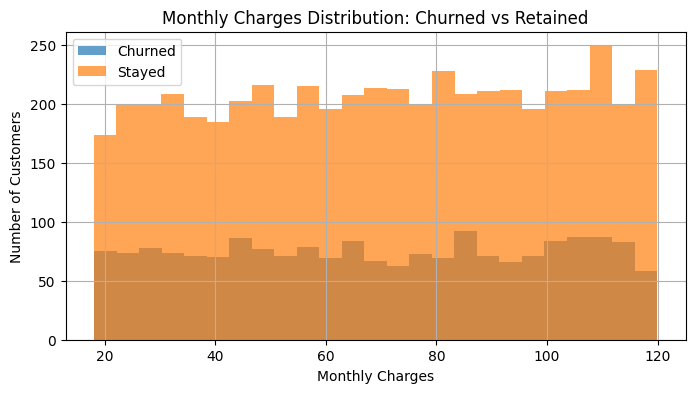

In [19]:
plt.figure(figsize=(8,4))
df[df["Churn"]=="Yes"]["MonthlyCharges"].hist(alpha=0.7, bins=25, label="Churned")
df[df["Churn"]=="No"]["MonthlyCharges"].hist(alpha=0.7, bins=25, label="Stayed")
plt.legend()
plt.title("Monthly Charges Distribution: Churned vs Retained")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()


## **Feature Engineering**

## **Create tenure buckets (segments)**

In [20]:
bins = [0, 1, 6, 12, 24, 48, 72]
labels = ['0', '1-5', '6-11', '12-23', '24-47', '48-71']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
df['tenure_group'].value_counts()


tenure_group
24-47    2374
48-71    2329
12-23    1081
6-11      565
1-5       504
0          95
Name: count, dtype: int64

## **Churn % by Tenure Group**

In [21]:
df.groupby("tenure_group")["Churn"].value_counts(normalize=True).mul(100).round(2)


C:\Users\91973\AppData\Local\Temp\ipykernel_11388\87392827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["Churn"].value_counts(normalize=True).mul(100).round(2)


tenure_group  Churn
0             No       75.79
              Yes      24.21
1-5           No       73.41
              Yes      26.59
6-11          No       74.69
              Yes      25.31
12-23         No       72.62
              Yes      27.38
24-47         No       73.46
              Yes      26.54
48-71         No       72.95
              Yes      27.05
Name: proportion, dtype: float64

## **Final Python Insights Table**

In [22]:
summary = pd.DataFrame({
    "Overall Churn Rate (%)": [round((df["Churn"]=="Yes").mean()*100,2)],
    "Avg Monthly Charges (Churned)": [round(df[df["Churn"]=="Yes"]["MonthlyCharges"].mean(),2)],
    "Avg Monthly Charges (Stayed)": [round(df[df["Churn"]=="No"]["MonthlyCharges"].mean(),2)],
    "Total Customers": [len(df)]
})
summary


,Overall Churn Rate (%),Avg Monthly Charges (Churned),Avg Monthly Charges (Stayed),Total Customers
0,26.68,69.21,70.26,7043


## **Business Insights Summary**

### Key Insights

- The overall churn rate is ~26.7% indicating that 1 in every 4 customers leave.
- Customers across contract types churn at similar rates, suggesting contract duration is not impacting retention.
- Monthly charges do not show major differences between churned vs retained groups (~₹69 vs ₹70), indicating pricing is not the primary reason for churn.
- Churn is consistent across tenure segments, meaning both new and long-term customers behave similarly.

### Business Recommendations

- Since contract type and pricing are not causing churn, further investigation into service quality, customer support experience, and promotions may be needed.
- Improve retention strategy across all customer groups instead of focusing solely on new or long-term customers.


In [23]:
df.to_csv("cleaned_telco_churn.csv", index=False)
